# HOMEWORK 1

## Matthew Pergolski | IST 652

Matthew_Pergolski_Homework_1 

### Supplemental Code to the Repport Submitted for IST 652 Homework 1

In [17]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 


In [18]:
# Choose to read data into a data frame as opposed to an array or list/list of dictionaries/etc. -- data frames seem more practical in the 'real world' (my personal view)

df = pd.read_csv('/Users/pergolicious/Library/CloudStorage/OneDrive-SyracuseUniversity/Syracuse University/Courses/IST 652/Files/donors_data.csv')

df = df.drop(columns=['Row Id', 'Row Id.', 'zipconvert_2', 'zipconvert_3', 'zipconvert_4', 'zipconvert_5', 'IC15', 'TARGET_B'], axis = 1)

df = df.rename(columns={'homeowner dummy':'Homeowner','NUMCHLD':'Number of Children','INCOME':'Income','gender dummy':'Gender',
                        'WEALTH':'Wealth','HV':'Avg Home Value','Icmed':'Med Family Income','Icavg':'Avg Family Income',
                       'NUMPROM':'Num Of Promotions','RAMNTALL':'Lifetime Gifts','MAXRAMNT':'Max Gifts','LASTGIFT':'Last Gift',
                       'totalmonths':'Months Since Last Donation','TIMELAG':'Timelag','AVGGIFT':'Avg Gift','TARGET_B':'Donor','TARGET_D':'Donation Amount'})

df['Homeowner'] = df['Homeowner'].astype('category')
df['Number of Children'] = df['Number of Children'].astype('category')
df['Income'] = df['Income'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Wealth'] = df['Wealth'].astype('category')

# The .info() method allows the programmer to see a nice, detailed summary of the data, what it is, and what it's constructed of.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Homeowner                   3120 non-null   category
 1   Number of Children          3120 non-null   category
 2   Income                      3120 non-null   category
 3   Gender                      3120 non-null   category
 4   Wealth                      3120 non-null   category
 5   Avg Home Value              3120 non-null   int64   
 6   Med Family Income           3120 non-null   int64   
 7   Avg Family Income           3120 non-null   int64   
 8   Num Of Promotions           3120 non-null   int64   
 9   Lifetime Gifts              3120 non-null   float64 
 10  Max Gifts                   3120 non-null   float64 
 11  Last Gift                   3120 non-null   float64 
 12  Months Since Last Donation  3120 non-null   int64   
 13  Timelag           

In [19]:
# The describe mehtod allows to see a statistical summary of the data set.  Simlar to the 'summary()' function in R/RStudio

df.describe()

,Avg Home Value,Med Family Income,Avg Family Income,Num Of Promotions,Lifetime Gifts,Max Gifts,Last Gift,Months Since Last Donation,Timelag,Avg Gift,Donation Amount
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000
mean,1141.361859,388.217308,432.088141,49.089423,110.399875,16.651397,13.522917,31.136859,6.861859,10.690713,6.499612
std,946.642162,172.815950,168.195104,22.717130,147.299933,22.223521,10.581439,4.132952,5.561209,7.443980,10.597849
min,0.000000,0.000000,0.000000,11.000000,15.000000,5.000000,0.000000,17.000000,0.000000,2.138889,0.000000
25%,556.000000,278.000000,318.000000,29.000000,45.000000,10.000000,7.000000,29.000000,3.000000,6.356092,0.000000
50%,822.000000,356.000000,396.000000,48.000000,81.000000,15.000000,10.000000,31.000000,5.000000,9.000000,0.500000
75%,1338.750000,465.000000,516.000000,65.000000,134.625000,20.000000,16.000000,34.000000,9.000000,12.811652,10.000000
max,5945.000000,1500.000000,1331.000000,157.000000,5674.900000,1000.000000,219.000000,37.000000,77.000000,122.166667,200.000000


In [20]:
# The .head() method allows us to preview a specified amount of rows (5 by default)

df.head()

,Homeowner,Number of Children,Income,Gender,Wealth,Avg Home Value,Med Family Income,Avg Family Income,Num Of Promotions,Lifetime Gifts,Max Gifts,Last Gift,Months Since Last Donation,Timelag,Avg Gift,Donation Amount
0,1,1,5,1,9,1399,637,703,74,102.0,6.0,5.0,29,3,4.857143,5.0
1,1,1,1,0,7,698,422,463,46,94.0,12.0,12.0,34,6,9.400000,10.0
2,0,2,5,1,8,828,358,376,32,30.0,10.0,5.0,29,7,4.285714,5.0
3,1,1,3,0,4,1471,484,546,94,177.0,10.0,8.0,30,3,7.080000,0.0
4,1,1,4,0,8,547,386,432,20,23.0,11.0,11.0,30,6,7.666667,0.0


1    2403
0     717
Name: Homeowner, dtype: int64


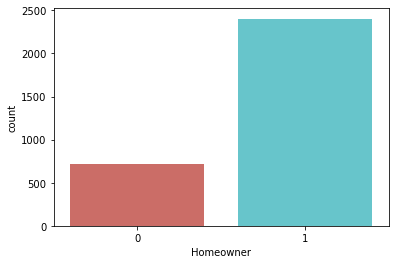

In [21]:
# Defining potential Target Variable for classifcation analysis (which implementing these algorithms is outside the scope of this assignment -- still an interesting tid bit to explore for this assignment)

print(df['Homeowner'].value_counts())

# Utilizing 'sb' and 'plt' to visualize findings
sb.countplot(x = 'Homeowner', data = df, palette = 'hls')
plt.savefig('Homeowner Freq Plot')

In [22]:
# Calculate percentage of homeowners vs non-homeowners

freq_no_homeowner = len(df[df['Homeowner'] == 0])
feq_homeowner = len(df[df['Homeowner'] == 1])
pct_of_no_homeowner = round((freq_no_homeowner)/(freq_no_homeowner + feq_homeowner), 4)
print('Percentage of Non-Homeowners is', pct_of_no_homeowner * 100)
pct_of_homeowner = round(feq_homeowner/(freq_no_homeowner + feq_homeowner), 4)
print('Percentage of Homeowners is', pct_of_homeowner * 100)

Percentage of Non-Homeowners is 22.98
Percentage of Homeowners is 77.02


In [23]:
# Few Observations from the grouped data -- this should sufficiently satisfy the multiple 'Unit of Analysis' requirements laid out in the assignment instructions:
# - Median and average incomes of those who are homeowners are higher than those who are not
# - Number of promotions is also higher for homeowners
# - Time between donations is shorter for those without a home

df.groupby('Homeowner').mean()

,Avg Home Value,Med Family Income,Avg Family Income,Num Of Promotions,Lifetime Gifts,Max Gifts,Last Gift,Months Since Last Donation,Timelag,Avg Gift,Donation Amount
Homeowner,,,,,,,,,,,
0,947.913529,344.541144,391.133891,48.933054,118.042775,17.857741,13.46583,30.942817,6.571827,10.766217,6.221060
1,1199.082397,401.249272,444.307948,49.136080,108.119409,16.291452,13.53995,31.194757,6.948398,10.668185,6.582726


In [24]:
# Continued analysis of a different 'Unit of Analysis' for this assignment

df.groupby('Income').mean()

,Avg Home Value,Med Family Income,Avg Family Income,Num Of Promotions,Lifetime Gifts,Max Gifts,Last Gift,Months Since Last Donation,Timelag,Avg Gift,Donation Amount
Income,,,,,,,,,,,
1,845.198582,313.301418,358.138298,52.226950,110.853794,14.542553,12.127660,30.581560,6.872340,9.508049,5.702128
2,814.226496,316.474359,359.491453,51.416667,124.870064,17.885684,12.561966,30.797009,6.634615,9.845202,5.183312
3,938.000000,351.189189,395.047297,49.841216,100.303209,15.097973,12.685811,30.722973,7.030405,9.851968,5.472973
4,1122.822412,374.622032,418.970560,48.794872,110.554843,16.142707,13.111111,31.192783,6.943020,10.542510,6.436847
5,1151.138318,414.020561,457.985047,47.392523,104.483252,16.469159,13.868224,31.357009,7.087850,10.972647,7.565421
6,1773.077236,506.361789,545.833333,48.207317,115.499268,18.495935,16.020325,31.532520,6.288618,12.184812,7.957317
7,1790.120833,542.841667,589.462500,45.916667,101.384542,19.385792,16.545833,31.820833,6.812500,13.253858,7.675000


In [25]:
# Continued analysis of a different 'Unit of Analysis' for this assignment

df.groupby('Gender').mean()

,Avg Home Value,Med Family Income,Avg Family Income,Num Of Promotions,Lifetime Gifts,Max Gifts,Last Gift,Months Since Last Donation,Timelag,Avg Gift,Donation Amount
Gender,,,,,,,,,,,
0,1167.429861,393.624282,437.600492,48.126333,103.948285,16.579385,14.076292,31.327317,6.920427,11.333773,6.663142
1,1124.645976,384.750132,428.553393,49.706996,114.536902,16.697575,13.168069,31.014729,6.824303,10.278357,6.394750


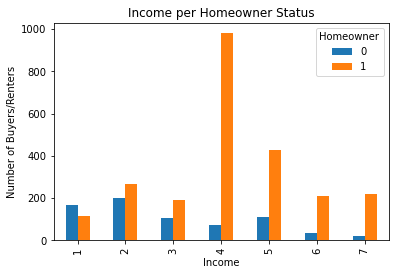

In [26]:
# Utilizing matplotlib to visualize Income vs Homeowner Status

%matplotlib inline
pd.crosstab(df['Income'], df['Homeowner']).plot(kind='bar')
plt.title('Income per Homeowner Status')
plt.xlabel('Income')
plt.ylabel('Number of Buyers/Renters')
plt.savefig('Homeowner-Renter')

# OBSERVATION: Homeowners tend to have higher income levels than renters.  Income status seems to be a good predictor for home ownership.

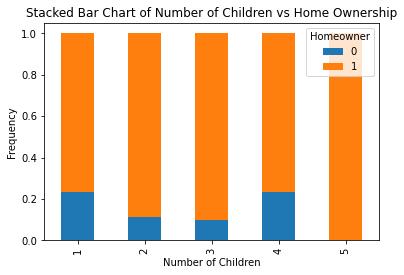

In [27]:
# Utilizing matplotlib to visualize Number of Children vs Homeowner Status

table = pd.crosstab(df['Number of Children'], df['Homeowner'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Number of Children vs Home Ownership')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.savefig('Num Child vs Homeownership')

# Those with Children Seem to mostly be homeowners

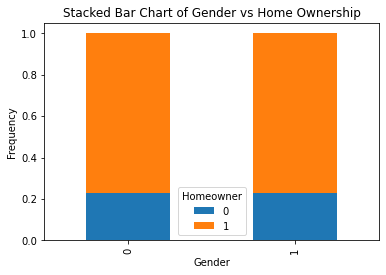

In [28]:
# Utilizing matplotlib to visualize Gender vs Homeowner Status

table = pd.crosstab(df['Gender'],df['Homeowner'])
table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender vs Home Ownership')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.savefig('GenderVsHomeownership')

# Gender does not seem to be a good indicator for home ownership

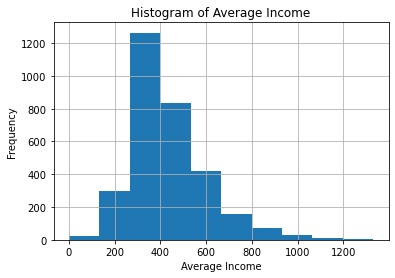

In [29]:
# TANGENT plot (i.e., supplemental information only) | Average Family income shown below via matplotlib

df['Avg Family Income'].hist()
plt.title('Histogram of Average Income')
plt.xlabel('Average Income')
plt.ylabel('Frequency')
plt.savefig('HistAvgIncome')

# Most have an income in the range of $300-400K

In [30]:
# Confirm dummy variables data type | Could be used for future classification models
# Recalling the .info() method to confirm 'Dtype' designation

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Homeowner                   3120 non-null   category
 1   Number of Children          3120 non-null   category
 2   Income                      3120 non-null   category
 3   Gender                      3120 non-null   category
 4   Wealth                      3120 non-null   category
 5   Avg Home Value              3120 non-null   int64   
 6   Med Family Income           3120 non-null   int64   
 7   Avg Family Income           3120 non-null   int64   
 8   Num Of Promotions           3120 non-null   int64   
 9   Lifetime Gifts              3120 non-null   float64 
 10  Max Gifts                   3120 non-null   float64 
 11  Last Gift                   3120 non-null   float64 
 12  Months Since Last Donation  3120 non-null   int64   
 13  Timelag           

In [31]:
# Grouping categorical variables and producing an array of all featuers kept within the data set | Supplemental informaiton only

cat_vars=['Number of Children','Income','Wealth']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1 = df.join(cat_list)
    df = df1

cat_vars = ['Number of Children','Income','Wealth']
df_vars = df.columns.values.tolist()
to_keep = [i for i in df_vars if i not in cat_vars]

df_final = df[to_keep]
df_final.columns.values

array(['Homeowner', 'Gender', 'Avg Home Value', 'Med Family Income',
       'Avg Family Income', 'Num Of Promotions', 'Lifetime Gifts',
       'Max Gifts', 'Last Gift', 'Months Since Last Donation', 'Timelag',
       'Avg Gift', 'Donation Amount', 'Number of Children_1',
       'Number of Children_2', 'Number of Children_3',
       'Number of Children_4', 'Number of Children_5', 'Income_1',
       'Income_2', 'Income_3', 'Income_4', 'Income_5', 'Income_6',
       'Income_7', 'Wealth_0', 'Wealth_1', 'Wealth_2', 'Wealth_3',
       'Wealth_4', 'Wealth_5', 'Wealth_6', 'Wealth_7', 'Wealth_8',
       'Wealth_9'], dtype=object)